# Final Project 
## Song Recommender 

Mario Jacobo and Alexander Baez 


In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns 

In [2]:
uploaded = files.upload()

Saving tracks.csv to tracks.csv


In [211]:
data = pd.read_csv('tracks.csv')

# Introducing the Dataset 

- Dataset consists of 21 columns and 114 thousand rows:

In [212]:
data.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

In [213]:
data.shape

(586672, 20)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

# Data Cleanup

In [215]:
#Identify how many rows are missing values
data.isnull().sum()
#Drop all rows that are missing values
data = data.dropna()
#Check dataset shape again after dropping rows with missing values
data.shape

(586601, 20)

In [216]:
# Drop columns that will not be used in data processing - i.e id & id_artists
#data = data.drop(['id_artists','id'], axis = 1)
# Drop rows that have a duration of over 6 minutes
data = data[data.duration_ms < 400000]
data = data[data.duration_ms > 120000]
data.shape

(518604, 20)

In [217]:
# Create a new column that shows the year and get rid of release_date column 
data['year'] = pd.DatetimeIndex(data['release_date']).year
data = data.drop(['release_date'], axis = 1)
# Sort by year (we will be using newer songs to train the models later on)
data = data.sort_values(by=['year'])

# Data Visualizations:


## Correlation Matrix 
- Helps identify any correlation between features in the dataset

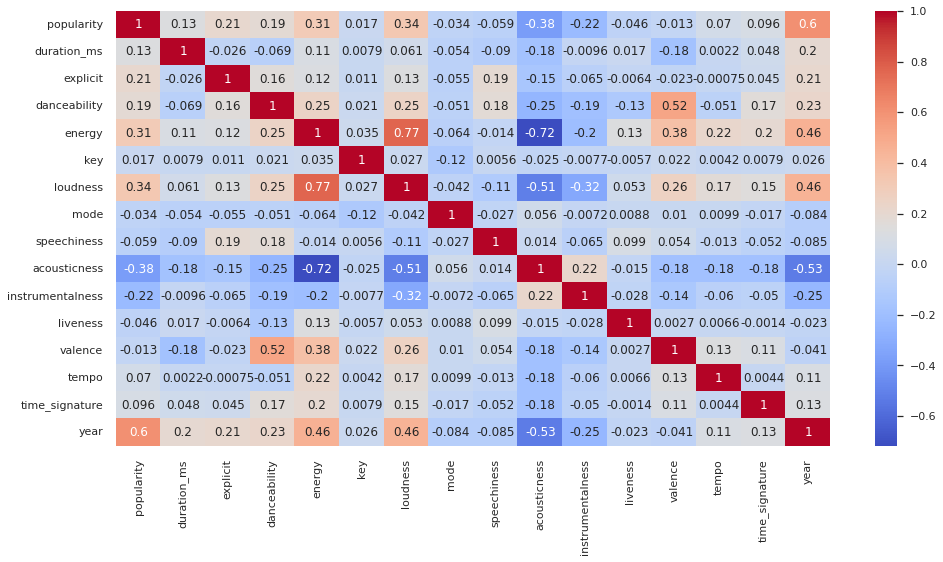

In [218]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')

Some observations:
- Loudness and Energy have a strong positive correlation 
- Valence and danceability have a strong correlation
- Energy and Acousticness have a strong negative correlation



## Music over the years:

(1920.0, 2022.0)

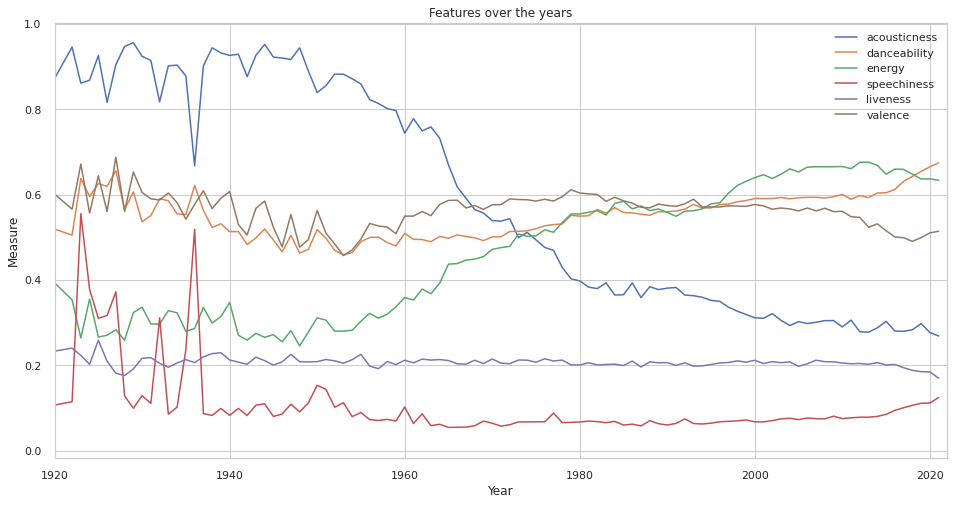

In [219]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for i in columns:
    x = data.groupby("year")[i].mean()
    ax = sns.lineplot(x=x.index,y=x,label=i)
ax.set_title('Features over the years')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
ax.set_xlim(1920,2022)

Observations:
- Acousticness has decreased over the last 100 years 
- Energy has increased 
- The rest of the features (valence, liveness, danceability and speechiness have not changed much 

## Popularity:

(1920.0, 2020.0)

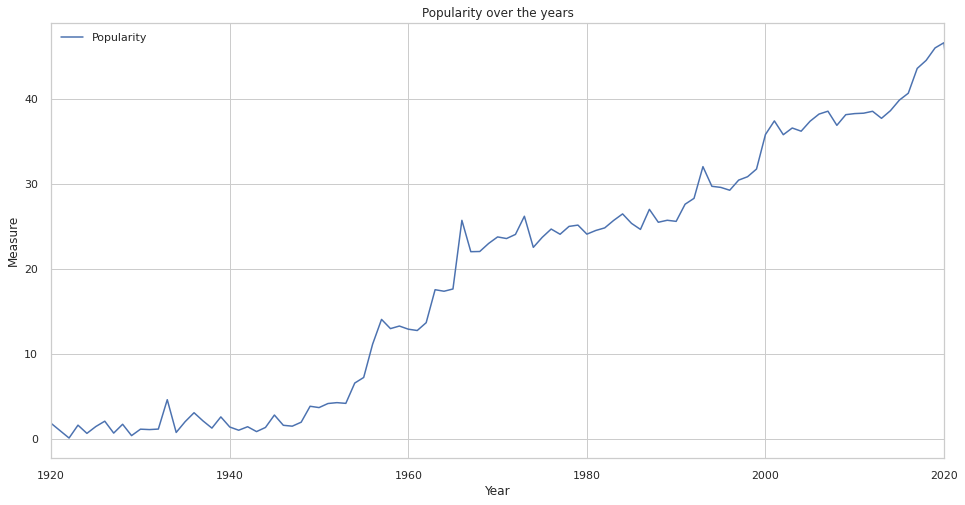

In [220]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

x = data.groupby("year")["popularity"].mean()
ax = sns.lineplot(x=x.index,y=x,label='Popularity')
ax.set_title('Popularity over the years')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
ax.set_xlim(1920,2020)

This graph shows that newer songs are much more popular. The popularity is calculated by an algorithm and is mostly based on the total number of plays the track has had and how recent those plays are. This explains why newer songs have a higher popularity rating.

In [221]:
data['popularity'].describe()

count    518604.000000
mean         28.345884
std          18.541220
min           0.000000
25%          13.000000
50%          28.000000
75%          42.000000
max         100.000000
Name: popularity, dtype: float64

The mean popularity rating is right around 28, with the min and max being 0 and 100 respectively. 

These are the top 10 artists:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

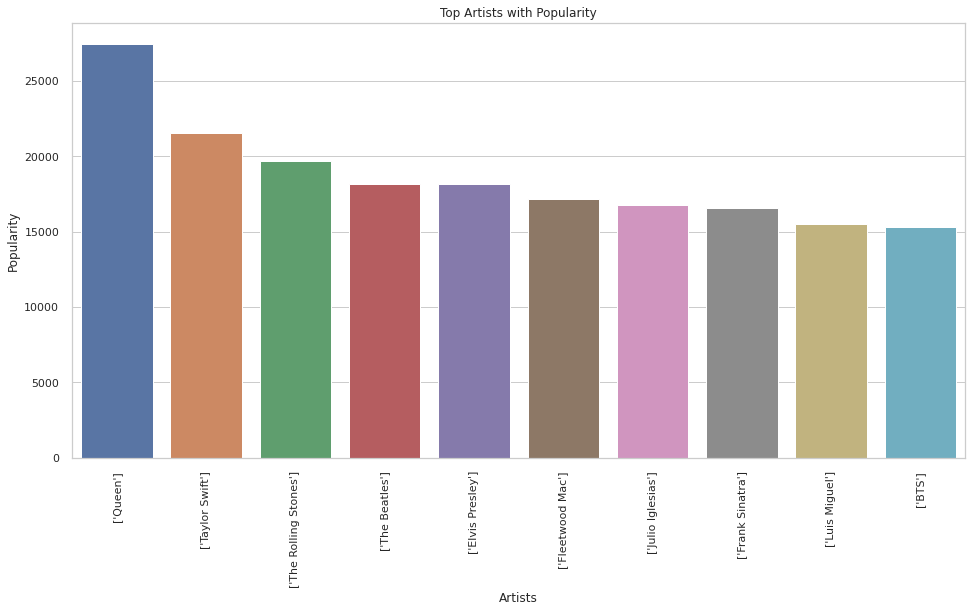

In [222]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
# Create a plot basd on artists and their popularity score
x = data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

# Pre-Processing:

In [223]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

- Use smaller set for training purposes

In [224]:
# Use the newest 50,000 tracks for training purposes
tr_data = data.drop(data.index[0:468604])
tr_data.shape

(50000, 20)

In [225]:
# Drop Duplicates of songs 
tr_data = tr_data.drop_duplicates(subset=['name', 'artists'], keep='first')

- Use only numerical columns for KMeans implementation

In [226]:
# Create a dataframe consisting of only numerical values for standardizing 
X = tr_data.select_dtypes(np.number)

# Drop time_signature column since it is not an important features of each song
X = X.drop('time_signature', axis = 1)

## Elbow Method on different types of SKlearn Scalers:

No scaling on data:
  - Returned a distortion score of 962980026763

>  **Note**: Distortion Score - the sum of squared distances from each point to its centroid. 

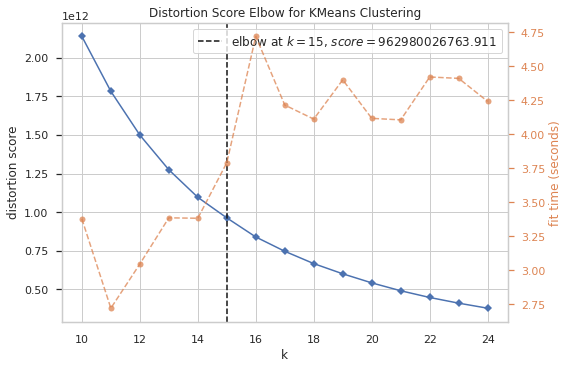

In [227]:
from yellowbrick.cluster import KElbowVisualizer
# Use KElbow Visualizer to help with the elbow method and pick best number of clusters
model = KMeans()
# test out elbow method on 10-25 clusters
visualizer = KElbowVisualizer(model, k=(10,25))

# fit onto X which is the raw data with no modifications
visualizer.fit(X)   
visualizer.show()   

MinMaxScaler: 
 - Returned a distortion score of 15140

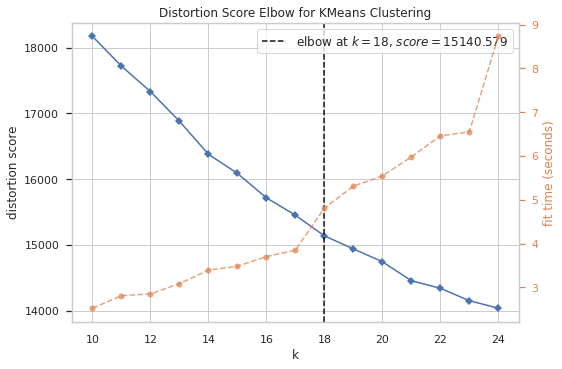

In [228]:
scaler = MinMaxScaler()
minmax_X = scaler.fit_transform(X)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(10,25))
visualizer.fit(minmax_X)   
visualizer.show()        

StandardScaler:
- Returned a distortion score of 374556

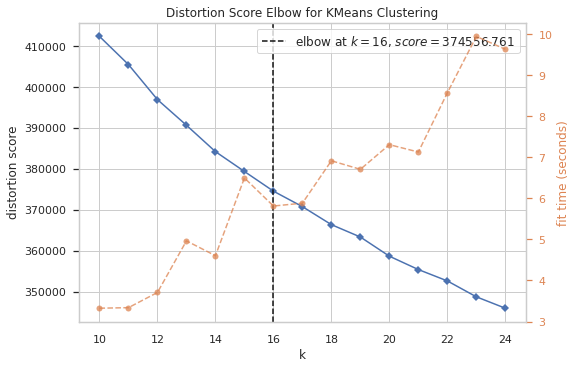

In [229]:
scaler1 = StandardScaler()
Xte1 = scaler1.fit_transform(X)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(10,25))
visualizer.fit(Xte1)   
visualizer.show()   

The Scaler yielding the best results is the MinMaxScaler with a distortion score of 15140 and 18 clusters

## Clustering the songs:

In [249]:
# pipeline implementing MinMaxScaler and Kmeans w/ 19 clusters
pipe1 = Pipeline([
    ('scl', MinMaxScaler()),
    ('kmeans', KMeans(init='k-means++', n_clusters = 18))])

# use fit and predict to label the data according to what cluster it belongs to 
clusters = pipe1.fit_predict(X)
tr_data['cluster_label'] = clusters

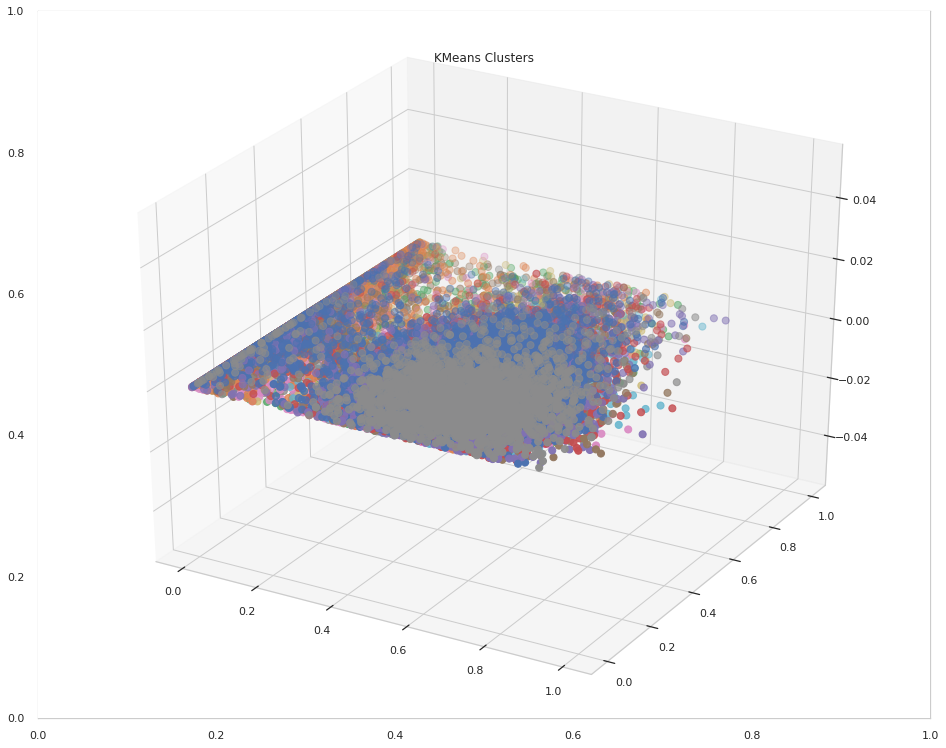

In [250]:
# visualizing clusters
fig, ax = plt.subplots(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
for i in range(20):
  plt.scatter(minmax_X[clusters == i,0], minmax_X[clusters == i,1], s=50)

plt.title('KMeans Clusters')
plt.show()


## PCA

### 2 Principal Components:

In [251]:
# pipeline applying StandardScaler and PCA w/ 2 principal components
pca_pipe = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(n_components = 2))
])

# Categorize each song to a cluster and fitting and transforming X to PCA
song_cluster = pca_pipe.fit_transform(X)
# New dataframe to be used for our later plots. Plotting X, Y, and the cluster number
projection = pd.DataFrame(columns=['x', 'y'], data=song_cluster)
# Match both indexes on both dataframes for manipulation between the two
tr_data = tr_data.set_index(projection.index)
projection['title'] = tr_data['name']
projection['cluster'] = tr_data['cluster_label']

In [252]:
fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['title'])
fig.show()

### 3 Principal Components:

In [253]:
pipe = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(n_components = 3))
])

song_cluster = pipe.fit_transform(X)
projection1 = pd.DataFrame(columns=['x', 'y','z'], data=song_cluster)
tr_data = tr_data.set_index(projection1.index)
projection1['title'] = tr_data['name']
projection1['cluster'] = tr_data['cluster_label']

In [254]:
fig = px.scatter_3d(projection1, x='x', y='y', z='z', color='cluster', hover_data=['title'])
fig.show()

# Kmeans:

In [255]:
# Columns that will be used during process - rec = columns that the fcn will return for recommendations & features = the numerical values that will be used 
# in calculations 
rec = ['name',  'artists']
features = ['popularity', 'duration_ms', 'explicit',
            'danceability', 'energy', 'key','loudness',
            'mode','speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence',
            'tempo', 'year']


# Function that takes a song as an input and verifies that the song is in the dataset 
def songs(song_list, tr_data):
   
    # start off w/ empty vector for songs
    song_vec = []
    
    # Verify that the chosen song is in the dataset - return error if it is not 
    for song in song_list:
        try:
            song_data = tr_data[(tr_data['name'] == song['name']) & 
                                (tr_data['year'] == song['year'])].iloc[0]
        except IndexError:
            song_data = None
            
        if song_data is None:
            print('{} does not exist in dataset'.format(song['name']))
            continue
            
        # if it is add song to the song vector     
        song_vec.append(song_data[features].values)  

    # return mean of all songs that have been added to the list 
    return np.mean(np.array(list(song_vec)), axis=0)

In [256]:
# Fcn that takes the song or song list. alongside the dataset being used and returns n number of recommendations 
def recommend(song_list, tr_data, n_songs=5):

    # Call the previous function to give the mean of the song/song list that the user chose
    song_center = songs(song_list, tr_data)
    
    # Apply the kmeans pipe which includes MinMaxScaler - as defined several cells above 
    scaler = pipe1.steps[0][1]
    scaled_data = scaler.transform(tr_data[features])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    
    # Calculte euclidean distance for the song that was chosen to calculate nearest points to song 
    dist = euclidean_distances(scaled_song_center, scaled_data)

    # Save nearest songs to index for it to be called to the result
    index = list(np.argsort(dist)[:,:n_songs][0])
    result = tr_data.iloc[index]
  
    
    return result[rec]

## Testing the model:

In [257]:
recommend([{'name': 'Emotionally Scarred', 'year': 2020}],tr_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



name  \
37296                          Emotionally Scarred   
30607                                        MAYBE   
36403  F*CK YOU, GOODBYE (feat. Machine Gun Kelly)   
32231                   BRAVI A CADERE - I polmoni   
40638                                Tequila Shots   

                                      artists  
37296                            ['Lil Baby']  
30607                       ['The Kid LAROI']  
36403  ['The Kid LAROI', 'Machine Gun Kelly']  
32231                           ['Marracash']  
40638                            ['Kid Cudi']

In [258]:
recommend([{'name': 'Blinding Lights', 'year': 2020}],tr_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



name                    artists
38386         Blinding Lights             ['The Weeknd']
40692         Black And White            ['Niall Horan']
44932  la di die (feat. jxdn)  ['Nessa Barrett', 'jxdn']
37941       Forever After All             ['Luke Combs']
41842              Stargazing      ['The Neighbourhood']

# K-Nearest Neighbors:

In [259]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [270]:
# Create knn model
model_knn = NearestNeighbors(algorithm='kd_tree',n_neighbors=18)

In [271]:
# test dataframe for training 
test = pd.DataFrame(X, columns = ['popularity','duration_ms','explicit','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','year'])

# scale data in test using MinMaxScaler
scaler = MinMaxScaler()
minmax_test = scaler.fit_transform(test)
minmax_test = pd.DataFrame(minmax_test, columns = ['popularity','duration_ms','explicit','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','year'])

# Add the ID column back into test dataframe to be able to match up songs back the the training data for training purposes
extracted_col = tr_data["id"]
minmax_test = minmax_test.set_index(extracted_col.index)
minmax_test = minmax_test.join(extracted_col)
minmax_test.index = minmax_test['id']
minmax_test = minmax_test.drop(['id'],axis=1)
# Drop time_signature - not an important metric 
minmax_test = minmax_test.drop(['time_signature'],axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning:

All-NaN slice encountered



In [272]:
# create a sparse matrix of the songs to be used in with the knn model 
songs = csr_matrix(minmax_test)
model_knn.fit(songs)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning:

cannot use tree with sparse input: using brute force



NearestNeighbors(algorithm='kd_tree', n_neighbors=18)

In [273]:
# recommendation fucntion 
def knn_recommend(idx, model, nor):
    nor = nor + 1
    # convert minmax_test to numpy and reshape it
    query = minmax_test.loc[idx].to_numpy().reshape(1,-1)
    print('Here are your recommendations...')
    distances, indices = model.kneighbors(query,n_neighbors = nor)
    
    for i in indices:
        # print the nearest neighbor(s) to input song using the original training data to index song
        print(tr_data[['name','artists']].loc[i].where(tr_data['id']!=idx).dropna())

## Testing the KNN Model:

In [274]:
# Print name of songs after inputing a name
name = input('Enter song title: ')
print('Results: ')
print(tr_data[['artists','name']].where(tr_data['name'] == name).dropna())

# locate input song in training data dataframe
ind = int(input('Enter the index value of the song: '))
idx = tr_data['id'].loc[ind]

# Index the correct song after user picks the correct index of the song they would like to choose
song = tr_data['name'].loc[ind]
artists = tr_data['artists'].loc[ind]

print('Song selected is ', song, 'by', artists)

# how many recommendations?
nor = int(input('Enter number of recommendations: '))

knn_recommend(idx, model_knn, nor)

Enter song title: The Box
Results: 
               artists     name
30158  ['Roddy Ricch']  The Box
Enter the index value of the song: 30158
Song selected is  The Box by ['Roddy Ricch']
Enter number of recommendations: 4
Here are your recommendations...
                                             name  \
21022  Remember The Name (feat. Eminem & 50 Cent)   
34450                                      JEWELZ   
19038                   WTF (feat. Amber Van Day)   
37649                  Say So (feat. Nicki Minaj)   

                                   artists  
21022  ['Ed Sheeran', 'Eminem', '50 Cent']  
34450                   ['Anderson .Paak']  
19038           ['HUGEL', 'Amber Van Day']  
37649          ['Doja Cat', 'Nicki Minaj']  
